**Import required libraries**

In [2]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
#import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model

In [29]:
# Initialize the random number generator
import random
seed = 7
np.random.seed(seed)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

**Mounting drive and importing Signal.csv**

In [7]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Setting the current working directory
import os
os.chdir('drive/My Drive/Colab Notebooks/NN-project')

In [12]:
#Read the data as a data frame
my_data = pd.read_csv('Signal.csv')
my_data.head(20)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Data analysis & visualisation**

In [14]:
# Shape of the data
my_data.shape

(1599, 12)

In [15]:
# Data type of each attribute
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Apart from Signal Strength rest all features are floating point.

In [24]:
# Checking the presence of missing values
null_counts = my_data.isnull().sum()

# Calculate the percentage of missing values for each attribute
missing_percentage = (null_counts / len(my_data)) * 100

# Print the percentage and count of missing values for each attribute
print(missing_percentage)
print (null_counts)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64
Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64


There are no null values in the data

In [26]:
# Check for duplicate records
duplicate_records = my_data.duplicated()

# Print the number of duplicate records
print(f"Number of duplicate records: {duplicate_records.sum()}")

# Display the duplicate records
print(my_data[duplicate_records])

# Impute duplicate records by removing them
my_data = my_data.drop_duplicates()

# Verify that duplicates have been removed
print(f"Number of duplicate records after imputation: {my_data.duplicated().sum()}")


Number of duplicate records: 240
      Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
4             7.4        0.700         0.00         1.90        0.076   
11            7.5        0.500         0.36         6.10        0.071   
27            7.9        0.430         0.21         1.60        0.106   
40            7.3        0.450         0.36         5.90        0.074   
65            7.2        0.725         0.05         4.65        0.086   
...           ...          ...          ...          ...          ...   
1563          7.2        0.695         0.13         2.00        0.076   
1564          7.2        0.695         0.13         2.00        0.076   
1567          7.2        0.695         0.13         2.00        0.076   
1581          6.2        0.560         0.09         1.70        0.053   
1596          6.3        0.510         0.13         2.30        0.076   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
4            11.

In [27]:
# 5 point summary of numerical attributes
my_data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Looking at the 11 parameters :
Parameter 3 ranges between 0 and 1.
Maximum value of Parameter 5 is 0.6
Parameter 8 has a very low range between 0.9 and 1.004
Standard deviation is lowest for Parameter 8, it is 0.001887
'Signal_Strength' has classes as - 3.5, 4.0,5.0, 6.0, 7.0 and 7.5

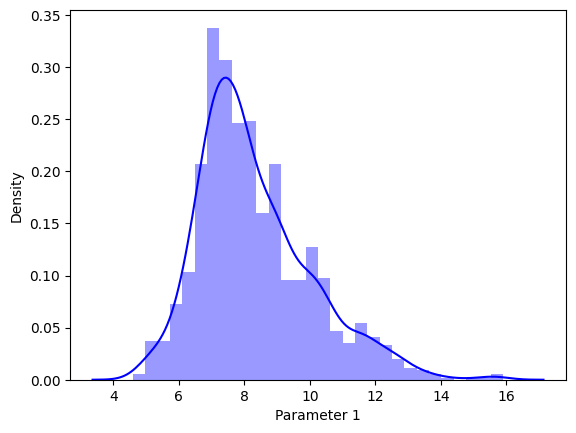

Distribution of  Parameter 1
Mean is: 8.310596026490067
Median is: 7.9
Mode is: 0    7.2
Name: Parameter 1, dtype: float64
Standard deviation is: 1.7369898075324683
Skewness is: 0.9410413664561449
Maximum is: 15.9
Minimum is: 4.6


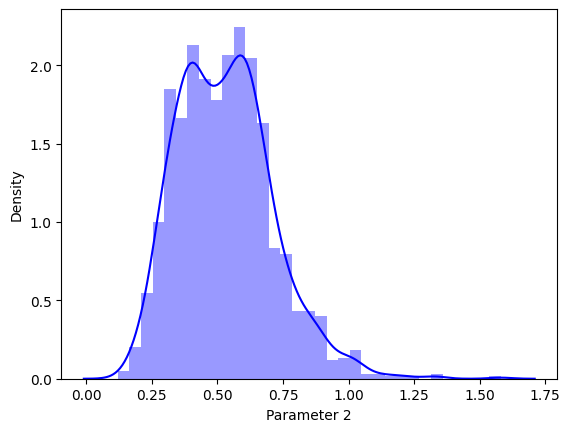

Distribution of  Parameter 2
Mean is: 0.5294775570272259
Median is: 0.52
Mode is: 0    0.5
Name: Parameter 2, dtype: float64
Standard deviation is: 0.1830313176190719
Skewness is: 0.7292789463991854
Maximum is: 1.58
Minimum is: 0.12


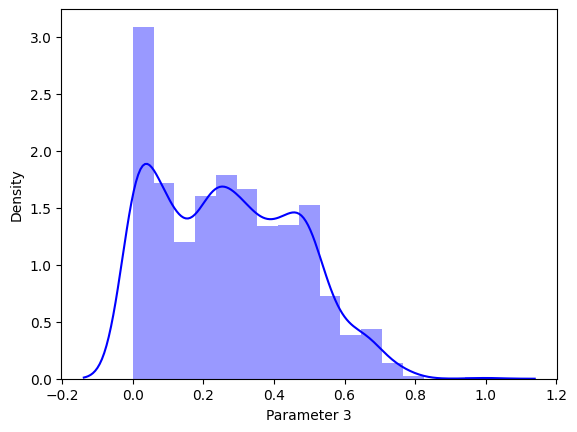

Distribution of  Parameter 3
Mean is: 0.2723325974981604
Median is: 0.26
Mode is: 0    0.0
Name: Parameter 3, dtype: float64
Standard deviation is: 0.1955365445504638
Skewness is: 0.31272554238899036
Maximum is: 1.0
Minimum is: 0.0


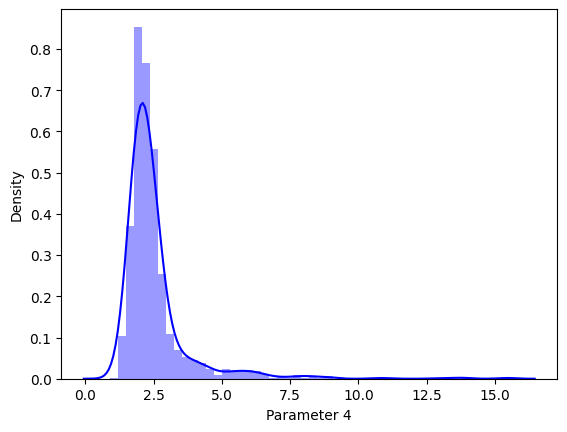

Distribution of  Parameter 4
Mean is: 2.5233995584988964
Median is: 2.2
Mode is: 0    2.0
Name: Parameter 4, dtype: float64
Standard deviation is: 1.3523137577104225
Skewness is: 4.548153403940447
Maximum is: 15.5
Minimum is: 0.9


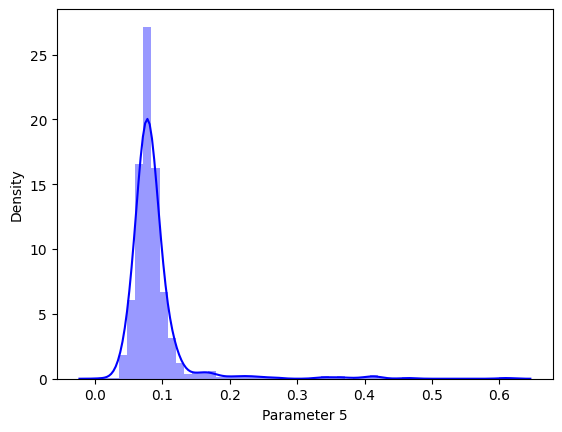

Distribution of  Parameter 5
Mean is: 0.08812362030905077
Median is: 0.079
Mode is: 0    0.08
Name: Parameter 5, dtype: float64
Standard deviation is: 0.04937686244348607
Skewness is: 5.502487294623722
Maximum is: 0.611
Minimum is: 0.012


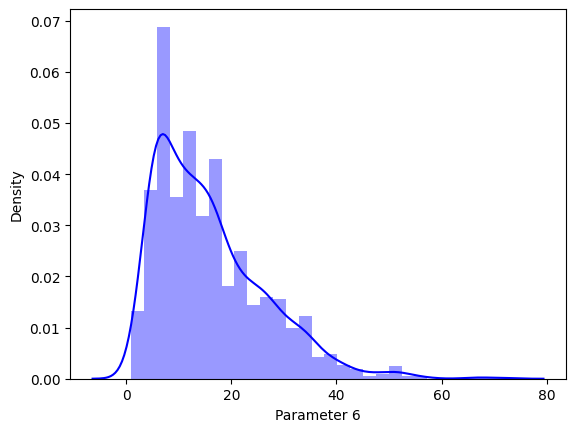

Distribution of  Parameter 6
Mean is: 15.893303899926417
Median is: 14.0
Mode is: 0    6.0
Name: Parameter 6, dtype: float64
Standard deviation is: 10.447270259048693
Skewness is: 1.2265794991760643
Maximum is: 72.0
Minimum is: 1.0


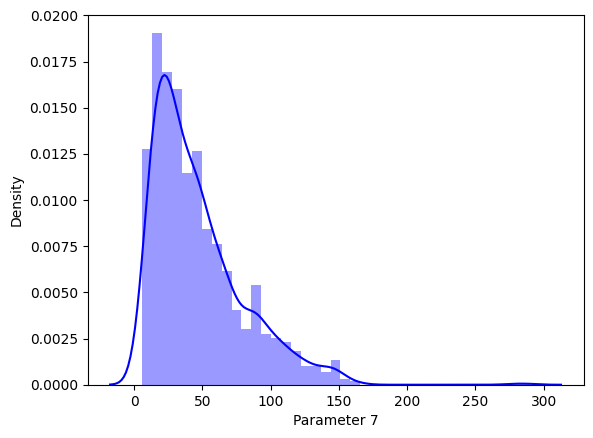

Distribution of  Parameter 7
Mean is: 46.82597498160412
Median is: 38.0
Mode is: 0    28.0
Name: Parameter 7, dtype: float64
Standard deviation is: 33.40894570661652
Skewness is: 1.5403680777213933
Maximum is: 289.0
Minimum is: 6.0


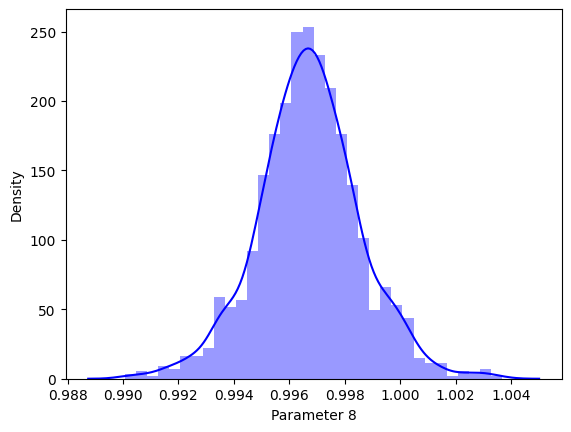

Distribution of  Parameter 8
Mean is: 0.9967089477557026
Median is: 0.9967
Mode is: 0    0.9968
Name: Parameter 8, dtype: float64
Standard deviation is: 0.0018689171325591413
Skewness is: 0.04477785573116107
Maximum is: 1.00369
Minimum is: 0.99007


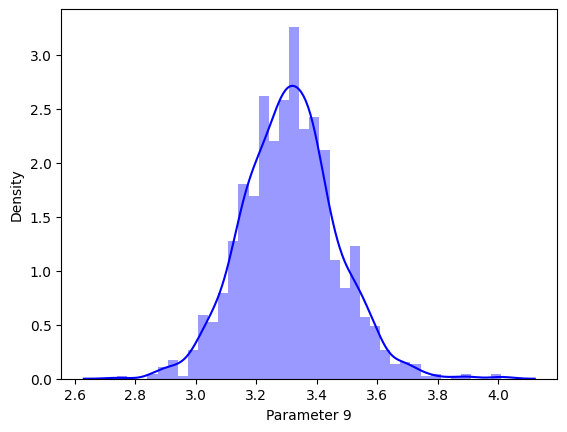

Distribution of  Parameter 9
Mean is: 3.309786607799853
Median is: 3.31
Mode is: 0    3.3
Name: Parameter 9, dtype: float64
Standard deviation is: 0.15503631128729617
Skewness is: 0.2320322752014824
Maximum is: 4.01
Minimum is: 2.74


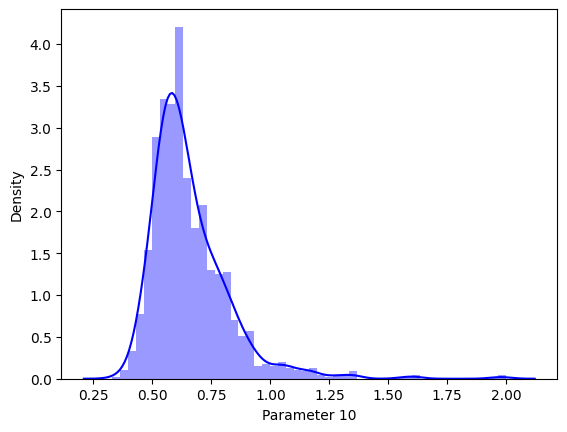

Distribution of  Parameter 10
Mean is: 0.6587049300956587
Median is: 0.62
Mode is: 0    0.54
Name: Parameter 10, dtype: float64
Standard deviation is: 0.17066689057420686
Skewness is: 2.4065046145674196
Maximum is: 2.0
Minimum is: 0.33


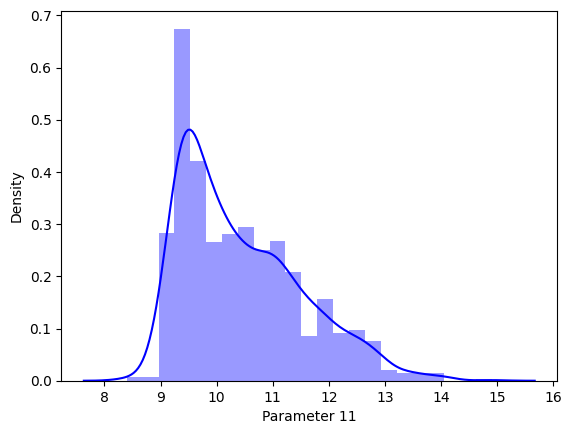

Distribution of  Parameter 11
Mean is: 10.432315428013245
Median is: 10.2
Mode is: 0    9.5
Name: Parameter 11, dtype: float64
Standard deviation is: 1.082065449949784
Skewness is: 0.8598411692319623
Maximum is: 14.9
Minimum is: 8.4


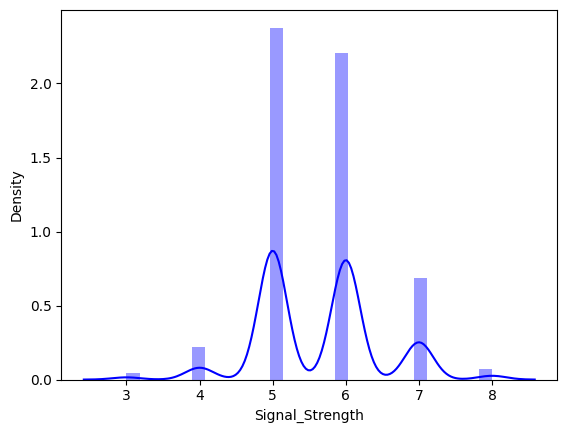

Distribution of  Signal_Strength
Mean is: 5.6232523914643116
Median is: 6.0
Mode is: 0    5
Name: Signal_Strength, dtype: int64
Standard deviation is: 0.8235780017165553
Skewness is: 0.19240658731658308
Maximum is: 8
Minimum is: 3


In [30]:
# studying the distribution of target variables
cols = list(my_data)
for i in np.arange(len(cols)):
    sns.distplot(my_data[cols[i]], color='blue')
    #plt.xlabel('Experience')
    plt.show()
    print('Distribution of ',cols[i])
    print('Mean is:',my_data[cols[i]].mean())
    print('Median is:',my_data[cols[i]].median())
    print('Mode is:',my_data[cols[i]].mode())
    print('Standard deviation is:',my_data[cols[i]].std())
    print('Skewness is:',my_data[cols[i]].skew())
    print('Maximum is:',my_data[cols[i]].max())
    print('Minimum is:',my_data[cols[i]].min())

Signal strength is a classification variable. All of them are positively skewed. Standard deviation is maximum for Parameter7, it is 33.40894570661652

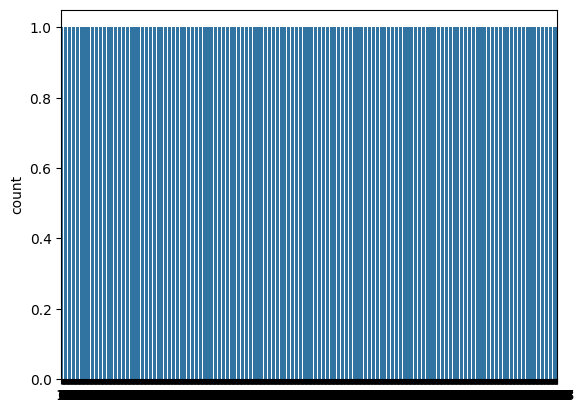

In [31]:
sns.countplot(my_data['Signal_Strength'])    # Distibution of the column 'Signal_Strength'
plt.show()

In [32]:
sns.pairplot(my_data,diag_kind='kde')
plt.show()

Output hidden; open in https://colab.research.google.com to view.



1. Parameter 6 and Parameter 7 are highly correlated with each other and visce versa and they have almost 0 correlation with other Parameters.
2. Parameter 1 is positively correlated to Parameter 3 and Parameter 8 and negatively correlated to Parameter 2 and Parameter 9.
3. Parameter 4 is has very low correlation with other Parameters.





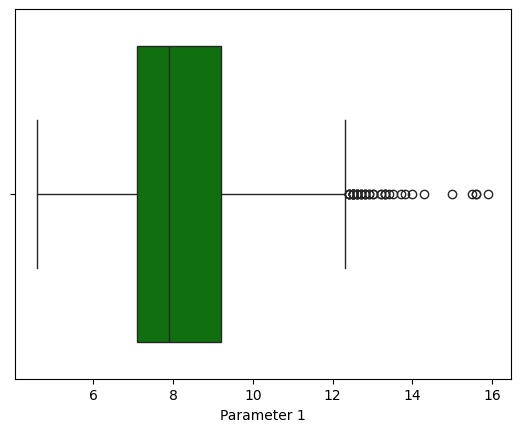

Boxplot of  Parameter 1
Q1 is :  7.1
Q2 is :  7.9
Q3 is :  9.2
IQR is: 2.0999999999999996
Lower Whisker, Upper Whisker :  3.95 , 12.349999999999998
Out of  1359  rows in data, number of outliers are: 41


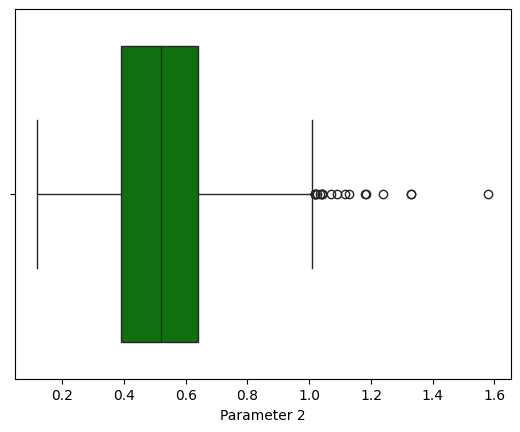

Boxplot of  Parameter 2
Q1 is :  0.39
Q2 is :  0.52
Q3 is :  0.64
IQR is: 0.25
Lower Whisker, Upper Whisker :  0.015000000000000013 , 1.0150000000000001
Out of  1359  rows in data, number of outliers are: 19


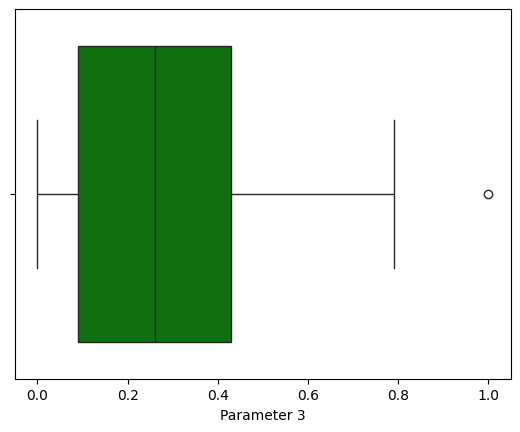

Boxplot of  Parameter 3
Q1 is :  0.09
Q2 is :  0.26
Q3 is :  0.43
IQR is: 0.33999999999999997
Lower Whisker, Upper Whisker :  -0.42000000000000004 , 0.94
Out of  1359  rows in data, number of outliers are: 1


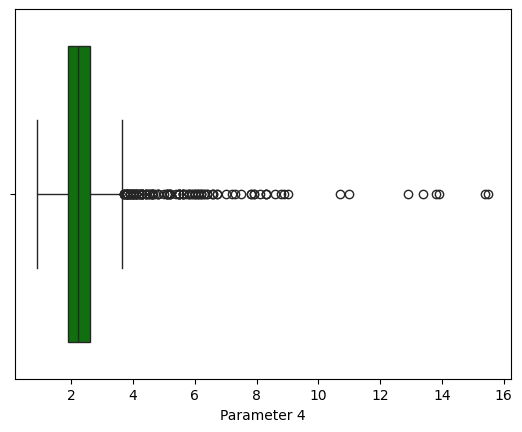

Boxplot of  Parameter 4
Q1 is :  1.9
Q2 is :  2.2
Q3 is :  2.6
IQR is: 0.7000000000000002
Lower Whisker, Upper Whisker :  0.8499999999999996 , 3.6500000000000004
Out of  1359  rows in data, number of outliers are: 126


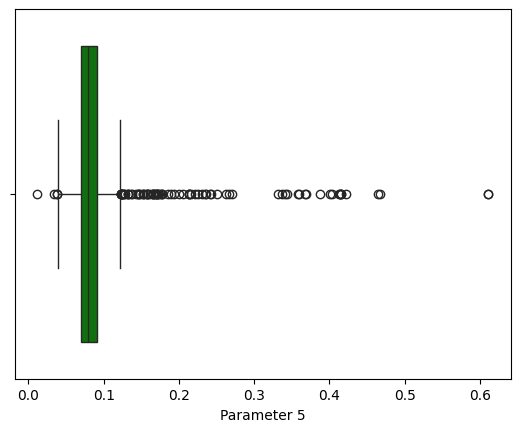

Boxplot of  Parameter 5
Q1 is :  0.07
Q2 is :  0.079
Q3 is :  0.091
IQR is: 0.02099999999999999
Lower Whisker, Upper Whisker :  0.03850000000000002 , 0.12249999999999998
Out of  1359  rows in data, number of outliers are: 87


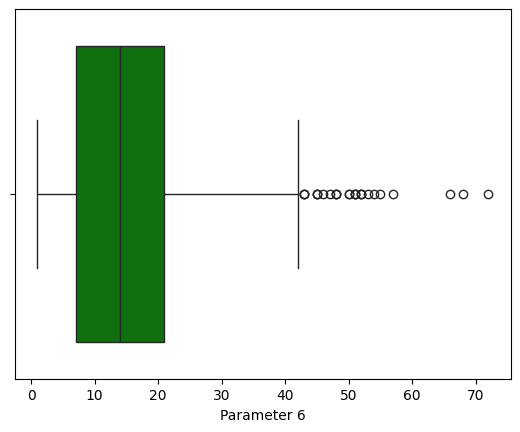

Boxplot of  Parameter 6
Q1 is :  7.0
Q2 is :  14.0
Q3 is :  21.0
IQR is: 14.0
Lower Whisker, Upper Whisker :  -14.0 , 42.0
Out of  1359  rows in data, number of outliers are: 26


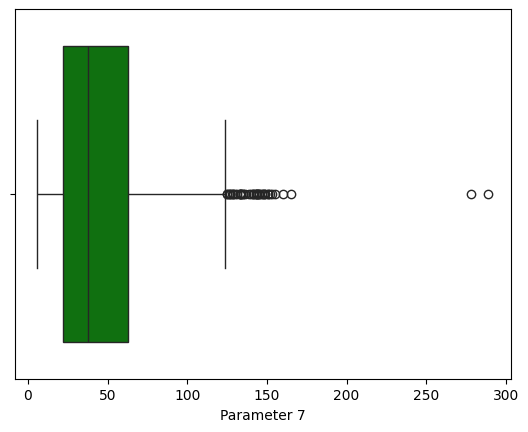

Boxplot of  Parameter 7
Q1 is :  22.0
Q2 is :  38.0
Q3 is :  63.0
IQR is: 41.0
Lower Whisker, Upper Whisker :  -39.5 , 124.5
Out of  1359  rows in data, number of outliers are: 45


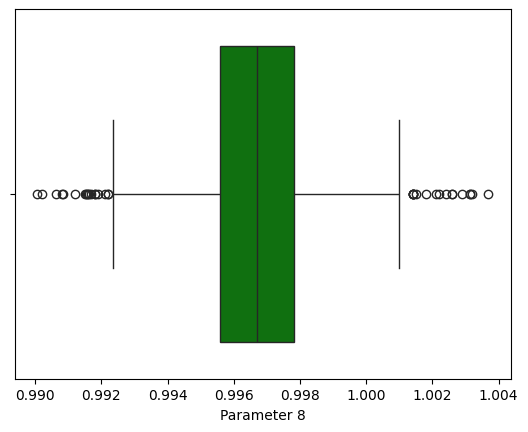

Boxplot of  Parameter 8
Q1 is :  0.9956
Q2 is :  0.9967
Q3 is :  0.99782
IQR is: 0.0022199999999999998
Lower Whisker, Upper Whisker :  0.99227 , 1.00115
Out of  1359  rows in data, number of outliers are: 35


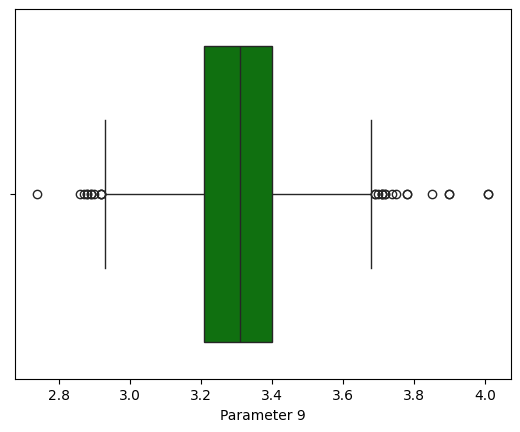

Boxplot of  Parameter 9
Q1 is :  3.21
Q2 is :  3.31
Q3 is :  3.4
IQR is: 0.18999999999999995
Lower Whisker, Upper Whisker :  2.925 , 3.6849999999999996
Out of  1359  rows in data, number of outliers are: 28


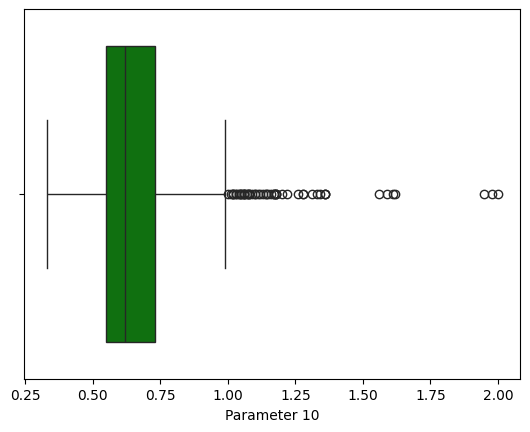

Boxplot of  Parameter 10
Q1 is :  0.55
Q2 is :  0.62
Q3 is :  0.73
IQR is: 0.17999999999999994
Lower Whisker, Upper Whisker :  0.28000000000000014 , 0.9999999999999999
Out of  1359  rows in data, number of outliers are: 55


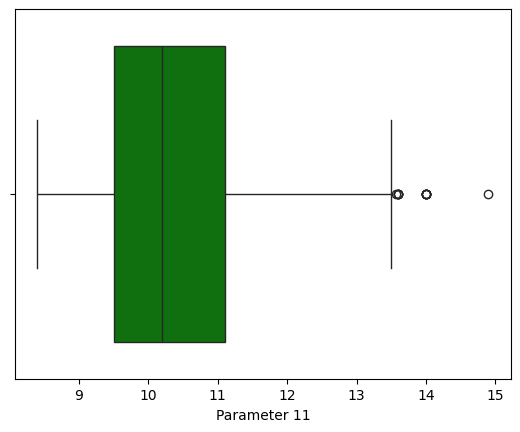

Boxplot of  Parameter 11
Q1 is :  9.5
Q2 is :  10.2
Q3 is :  11.1
IQR is: 1.5999999999999996
Lower Whisker, Upper Whisker :  7.1000000000000005 , 13.5
Out of  1359  rows in data, number of outliers are: 12


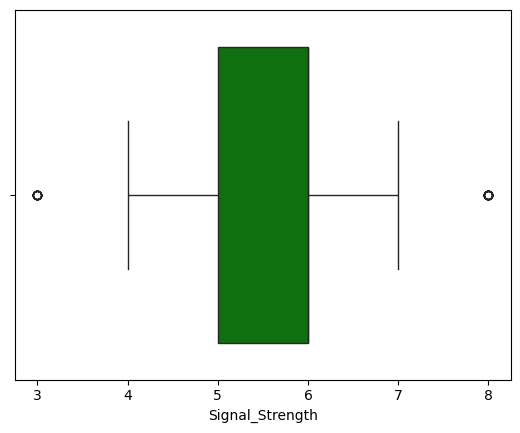

Boxplot of  Signal_Strength
Q1 is :  5.0
Q2 is :  6.0
Q3 is :  6.0
IQR is: 1.0
Lower Whisker, Upper Whisker :  3.5 , 7.5
Out of  1359  rows in data, number of outliers are: 27


In [33]:
# Checking the presence of outliers
l = len(my_data)
col = list(my_data.columns)
for i in np.arange(len(col)):
    sns.boxplot(x= my_data[col[i]], color='green')
    plt.show()
    print('Boxplot of ',col[i])
    #calculating the outiers in attribute
    Q1 = my_data[col[i]].quantile(0.25)
    Q2 = my_data[col[i]].quantile(0.50)
    Q3 = my_data[col[i]].quantile(0.75)
    IQR = Q3 - Q1
    L_W = (Q1 - 1.5 *IQR)
    U_W = (Q3 + 1.5 *IQR)
    print('Q1 is : ',Q1)
    print('Q2 is : ',Q2)
    print('Q3 is : ',Q3)
    print('IQR is:',IQR)
    print('Lower Whisker, Upper Whisker : ',L_W,',',U_W)
    bools = (my_data[col[i]] < (Q1 - 1.5 *IQR)) |(my_data[col[i]] > (Q3 + 1.5 * IQR))
    print('Out of ',l,' rows in data, number of outliers are:',bools.sum())   #calculating the number of outliers

Parameter 4 has the highest number of outliers which is 126.

In [34]:
#  function to treat outliers
def detect_treate_outliers(df,operation):
    cols=[]
    IQR_list=[]
    lower_boundary_list=[]
    upper_boundary_list=[]
    outliers_count=[]
    for col in df.columns:
        if((df[col].dtype =='int64' or df[col].dtype =='float64') and (col != 'HR')):
            IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
            lower_boundary = df[col].quantile(0.25) - (1.5 * IQR)
            upper_boundary = df[col].quantile(0.75) + (1.5 * IQR)
            up_cnt = df[df[col]>upper_boundary][col].shape[0]
            lw_cnt = df[df[col]<lower_boundary][col].shape[0]
            if(up_cnt+lw_cnt) > 0:
                cols.append(col)
                IQR_list.append(IQR)
                lower_boundary_list.append(lower_boundary)
                upper_boundary_list.append(upper_boundary)
                outliers_count.append(up_cnt+lw_cnt)
                if operation == 'update':
                    df.loc[df[col] > upper_boundary,col] = upper_boundary
                    df.loc[df[col] < lower_boundary,col] = lower_boundary
                else:
                    pass
            else:
                pass
    ndf = pd.DataFrame(list(zip(cols,IQR_list,lower_boundary_list,upper_boundary_list,outliers_count)),columns=['Features','IQR','Lower Boundary','Upper Boundary','Outlier Count'])
    if operation == 'update':
        return (len(cols),df)
    else:
        return (len(cols),ndf)

In [35]:
#Removing outliers by replacing the data below lower whisker with it and above upper whisker with it respectively.
count,df=detect_treate_outliers(my_data,'update')
if count>0:
    print('Updating dataset')
    my_data=df

Updating dataset


<Axes: >

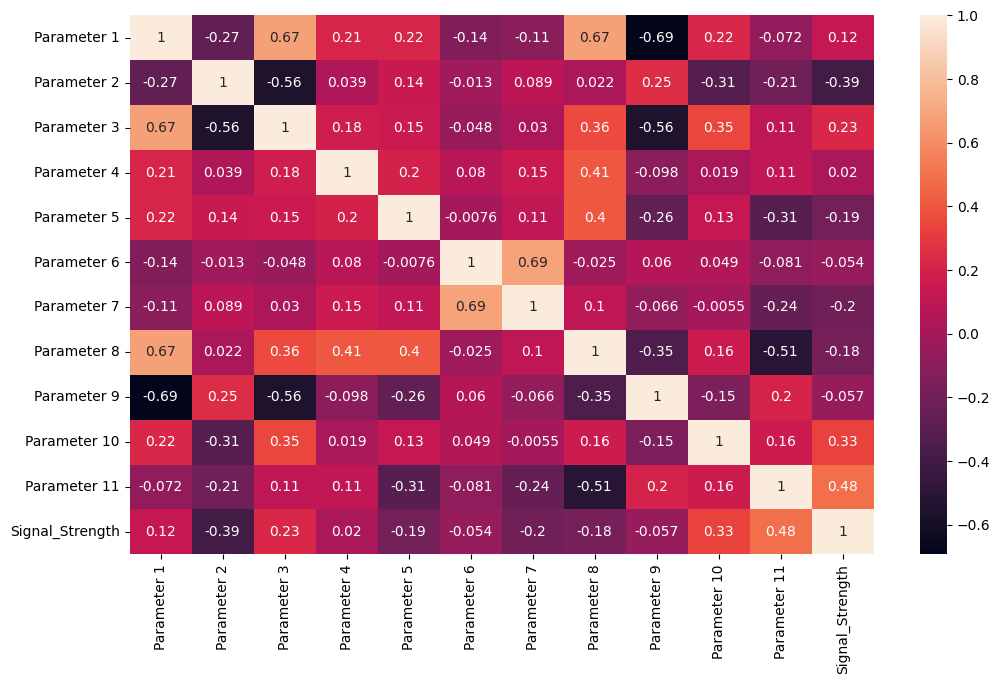

In [36]:
# studying correlation between the attributes
b_corr=my_data.corr()
plt.subplots(figsize =(12, 7))
sns.heatmap(b_corr,annot=True)

Since high correlation coefficient value lies between ± 0.50 and ± 1 Parameter 1 is highly correlated with Parameter 3 and Parameter 8, Parameter 9. Parameter 6 and 7 are highly correlated. But since, the correlation is not too high near 0.8 or above not dropping the features.

In [37]:
X = my_data.drop("Signal_Strength", axis=1)
y = my_data['Signal_Strength']

In [38]:
from sklearn.model_selection import train_test_split
# splitting to create test data
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30, random_state=seed)

In [39]:
X_vtrain.shape

(951, 11)

In [40]:
# splitting to create training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_vtrain, y_vtrain, test_size=.20, random_state=seed)

In [41]:
X_train.shape

(760, 11)

In [42]:
# Initialize Sequential model
model_reg = tf.keras.models.Sequential()

# Normalize input data
model_reg.add(tf.keras.layers.BatchNormalization(input_shape=(11,)))

# Add final Dense layer for prediction - Tensorflow.keras declares weights and bias automatically
model_reg.add(tf.keras.layers.Dense(1))

In [43]:
# Compile the model - add mean squared error as loss and stochastic gradient descent as optimizer
model_reg.compile(optimizer='sgd', loss='mse')

In [44]:
model_reg.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100, batch_size=10)

Epoch 1/100
76/76 [==============================] - 2s 10ms/step - loss: 4.9098 - val_loss: 5.6369
Epoch 2/100
76/76 [==============================] - 1s 8ms/step - loss: 0.7860 - val_loss: 1.0008
Epoch 3/100
76/76 [==============================] - 0s 3ms/step - loss: 0.5985 - val_loss: 0.5442
Epoch 4/100
76/76 [==============================] - 0s 3ms/step - loss: 0.5422 - val_loss: 0.5138
Epoch 5/100
76/76 [==============================] - 0s 3ms/step - loss: 0.5225 - val_loss: 0.4939
Epoch 6/100
76/76 [==============================] - 0s 4ms/step - loss: 0.4888 - val_loss: 0.4840
Epoch 7/100
76/76 [==============================] - 0s 3ms/step - loss: 0.4599 - val_loss: 0.4547
Epoch 8/100
76/76 [==============================] - 0s 4ms/step - loss: 0.4473 - val_loss: 0.4586
Epoch 9/100
76/76 [==============================] - 0s 3ms/step - loss: 0.4520 - val_loss: 0.4692
Epoch 10/100
76/76 [==============================] - 0s 3ms/step - loss: 0.4536 - val_loss: 0.4257
Epoch 11

In [45]:
# save the model
model_reg.save("model_reg.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [47]:
model_rr = load_model('model_reg.h5')

In [48]:
y_pred = model_rr.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [49]:
print(y_pred[0])
print(y_pred[1])
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])

[4.7498245]
[6.2604804]
[6.1868224]
[5.5787034]
[5.2849994]


In [50]:
print(y_test.head())

700     6.0
1220    6.0
1585    6.0
1027    5.0
15      5.0
Name: Signal_Strength, dtype: float64


The first 5 elements of y_pred and y_test are close.

In [51]:
score_r = r2_score(y_test,y_pred)
print(score_r)

0.3220505880663619


In [52]:
#summary of regression model
model_rr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 11)                44        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 56 (224.00 Byte)
Trainable params: 34 (136.00 Byte)
Non-trainable params: 22 (88.00 Byte)
_________________________________________________________________


In [54]:
X = my_data.drop("Signal_Strength", axis=1)
y = my_data['Signal_Strength']

In [55]:
from sklearn.model_selection import train_test_split

# splitting to create test data
X_vtrain, X_test, y_vtrain, y_test = train_test_split(X, y, test_size=.30, random_state=seed)

In [58]:
# counting the number of classes in output
my_data['Signal_Strength'].value_counts()

Signal_Strength
5.0    577
6.0    535
7.0    167
4.0     53
7.5     17
3.5     10
Name: count, dtype: int64

In [59]:
X.shape

(1359, 11)

In [60]:
y.shape

(1359,)

In [61]:
yc = to_categorical(y, num_classes=8)

In [62]:
# splitting data for test of categorial
Xcv_train, Xc_test, ycv_train, yc_test = train_test_split(X, yc, test_size=.30, random_state=seed)

In [63]:
print("Shape of y_train:", ycv_train.shape)
print("One value of y_train:", ycv_train[0])

Shape of y_train: (951, 8)
One value of y_train: [0. 0. 0. 0. 0. 0. 1. 0.]


In [64]:
# splitting data for  train and validation of categorial
Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xcv_train, ycv_train, test_size=.20, random_state=seed)

In [65]:
print("Shape of y_train:", yc_train.shape)
print("One value of y_train:", yc_train[0])

Shape of y_train: (760, 8)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0.]


In [66]:
model_class = Sequential()
model_class.add(Dense(11, activation='relu'))
model_class.add(Dense(8, activation='relu'))
model_class.add(Dense(8, activation='softmax'))

In [67]:
# Compile the model
model_class.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model_class.fit(x=Xc_train, y=yc_train, batch_size=20, epochs=100, validation_data=(Xc_val, yc_val))

Epoch 1/100
38/38 [==============================] - 2s 23ms/step - loss: 2.1881 - accuracy: 0.3908 - val_loss: 1.2926 - val_accuracy: 0.4607
Epoch 2/100
38/38 [==============================] - 0s 8ms/step - loss: 1.2656 - accuracy: 0.4737 - val_loss: 1.2275 - val_accuracy: 0.4817
Epoch 3/100
38/38 [==============================] - 0s 5ms/step - loss: 1.2217 - accuracy: 0.4934 - val_loss: 1.1944 - val_accuracy: 0.4660
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 1.1959 - accuracy: 0.4961 - val_loss: 1.1705 - val_accuracy: 0.4712
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 1.1761 - accuracy: 0.5079 - val_loss: 1.1848 - val_accuracy: 0.4660
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 1.1569 - accuracy: 0.5197 - val_loss: 1.1706 - val_accuracy: 0.4555
Epoch 7/100
38/38 [==============================] - 0s 4ms/step - loss: 1.1586 - accuracy: 0.5079 - val_loss: 1.1594 - val_accuracy: 0.4660
Epoch 8/100


In [68]:
# save the model
model_class.save("model_class.h5") #using h5 extension
print("model saved!!!")

model saved!!!


In [69]:
# load the model
model_cl = load_model('model_class.h5')

In [70]:
# calculate score of training data
score = model_cl.evaluate(Xc_train, yc_train, verbose=0)
print(score)

[1.093751072883606, 0.5223684310913086]


In [71]:
# score of test data
score_t = model_cl.evaluate(Xc_test, yc_test, verbose=0)
print( score_t)

[1.0926083326339722, 0.47058823704719543]


In [72]:
#summary of classification model
model_cl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 8)                 96        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
Total params: 300 (1.17 KB)
Trainable params: 300 (1.17 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
